In [14]:
!pip install tensorflow
from tensorflow import keras

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


You should consider upgrading via the 'C:\Users\alici\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [15]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


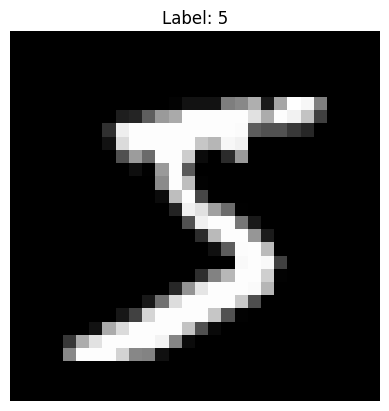

In [16]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap="gray") # cmap="gray" to make it balck & white
plt.title(f"Label: {y_train[0]}")
plt.axis("off")
plt.show()

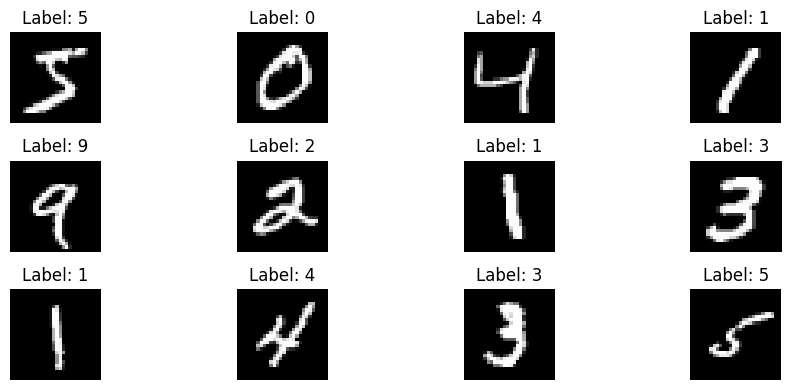

In [17]:
import matplotlib.pyplot as plt

num_images = 12
plt.figure(figsize=(10, 4))
for i in range(num_images):
    plt.subplot(3, 4, i + 1)
    plt.imshow(x_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()


You should consider upgrading via the 'C:\Users\alici\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\alici\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


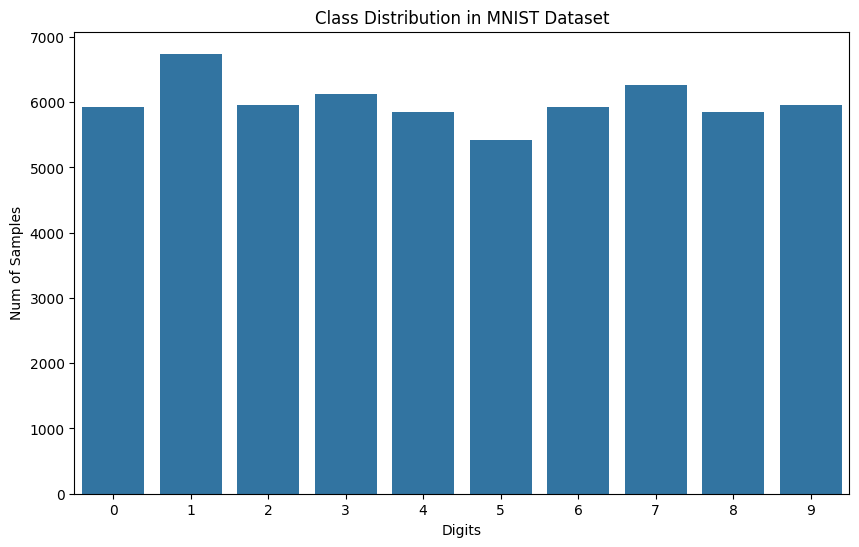

In [18]:
!pip install seaborn
!pip install numpy

import seaborn as sns
import numpy as np
unique, counts = np.unique(y_train, return_counts=True)
class_distribution = dict(zip(unique, counts))

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=list(class_distribution.keys()), y=list(class_distribution.values()))
plt.title("Class Distribution in MNIST Dataset")
plt.xlabel("Digits")
plt.ylabel("Num of Samples")
plt.xticks(rotation=0) # force them to be horizontal
plt.show()

In [19]:
base_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])


c:\Users\alici\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
# Normalize pixel values to [0,1]
x_train = x_train / 255.0
x_test = x_test / 255.0

base_model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
#base_model.fit(x_train, y_train, epochs=5)
base_history = base_model.fit(
    x_train, y_train,
    epochs=5,
    validation_data=(x_test, y_test)
)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9255 - loss: 0.2602 - val_accuracy: 0.9597 - val_loss: 0.1380
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9665 - loss: 0.1126 - val_accuracy: 0.9703 - val_loss: 0.0957
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9759 - loss: 0.0770 - val_accuracy: 0.9755 - val_loss: 0.0778
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9822 - loss: 0.0578 - val_accuracy: 0.9765 - val_loss: 0.0748
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9858 - loss: 0.0457 - val_accuracy: 0.9778 - val_loss: 0.0695


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


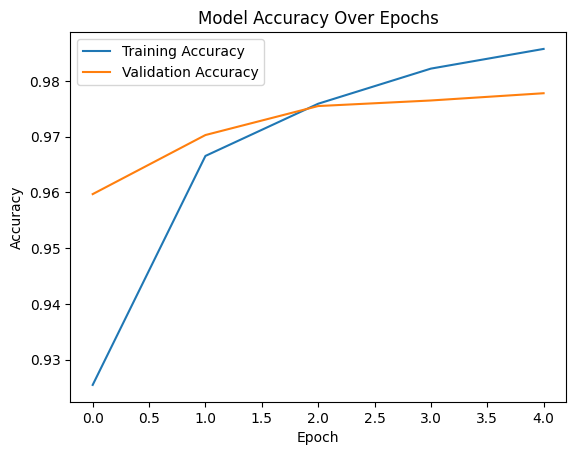

In [21]:
print(base_history.history.keys())

plt.plot(base_history.history["accuracy"], label="Training Accuracy")
if "val_accuracy" in base_history.history:
    plt.plot(base_history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Model Accuracy Over Epochs")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.show()

In [22]:
CNNmodel = keras.Sequential([
    keras.layers.Reshape((28, 28, 1), input_shape=(28, 28)),
    keras.layers.Conv2D(32, (3, 3), activation="relu"),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
])


c:\Users\alici\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\reshape.py:38: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
# Normalize pixel values to [0,1]
x_train = x_train / 255.0
x_test = x_test / 255.0

CNNmodel.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
#CNNmodel.fit(x_train, y_train, epochs=5)
CNN_history = CNNmodel.fit(
    x_train, y_train,
    epochs=5,
    validation_data=(x_test, y_test)
)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7418 - loss: 1.0580 - val_accuracy: 0.8790 - val_loss: 0.4510
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8844 - loss: 0.4047 - val_accuracy: 0.9036 - val_loss: 0.3448
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8984 - loss: 0.3450 - val_accuracy: 0.9106 - val_loss: 0.3149
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9050 - loss: 0.3229 - val_accuracy: 0.9141 - val_loss: 0.2989
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9097 - loss: 0.3099 - val_accuracy: 0.9154 - val_loss: 0.2893


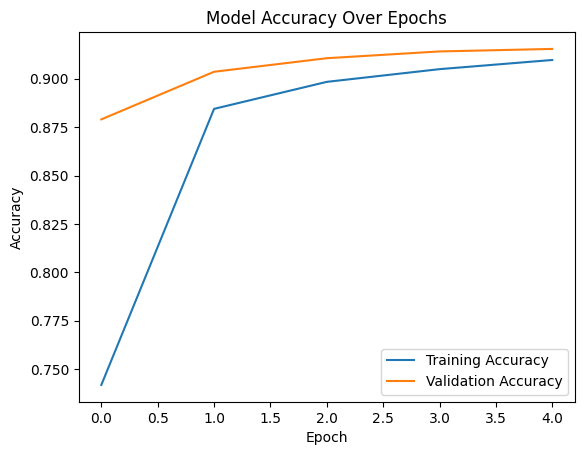

In [24]:
plt.plot(CNN_history.history["accuracy"], label="Training Accuracy")
if "val_accuracy" in CNN_history.history:
    plt.plot(CNN_history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Model Accuracy Over Epochs")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.show()

what if we run them for longer does that help?

In [25]:
base_history_lt = base_model.fit(
    x_train, y_train,
    epochs=15,
    validation_data=(x_test, y_test)
)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5208 - loss: 1.9635 - val_accuracy: 0.6597 - val_loss: 1.4488
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7822 - loss: 0.9879 - val_accuracy: 0.8512 - val_loss: 0.6605
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8708 - loss: 0.5331 - val_accuracy: 0.8924 - val_loss: 0.4230
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8968 - loss: 0.3866 - val_accuracy: 0.9067 - val_loss: 0.3366
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9077 - loss: 0.3280 - val_accuracy: 0.9134 - val_loss: 0.2981
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9157 - loss: 0.2952 - val_accuracy: 0.9220 - val_loss: 0.2747
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9225 - loss: 0.2712 - val_accuracy: 0.9272 - val_loss: 0.2557
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9279 - loss: 0.2518 - 

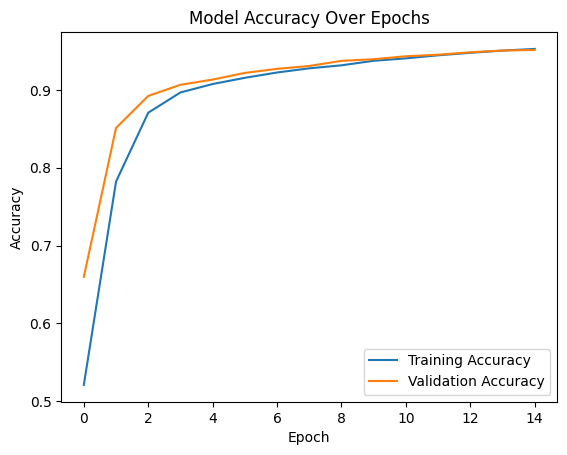

In [26]:
plt.plot(base_history_lt.history['accuracy'], label='Training Accuracy')
if 'val_accuracy' in base_history_lt.history:
    plt.plot(base_history_lt.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [27]:
CNN_history_lt = CNNmodel.fit(
    x_train, y_train,
    epochs=15,
    validation_data=(x_test, y_test) # for val accuracy
)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9121 - loss: 0.3016 - val_accuracy: 0.9170 - val_loss: 0.2847
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9143 - loss: 0.2948 - val_accuracy: 0.9169 - val_loss: 0.2848
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9162 - loss: 0.2893 - val_accuracy: 0.9209 - val_loss: 0.2748
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9172 - loss: 0.2848 - val_accuracy: 0.9213 - val_loss: 0.2735
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9184 - loss: 0.2808 - val_accuracy: 0.9205 - val_loss: 0.2713
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9197 - loss: 0.2775 - val_accuracy: 0.9221 - val_loss: 0.2689
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9203 - loss: 0.2738 - val_accuracy: 0.9244 - val_loss: 0.2671
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9215 - loss: 0.2710 -

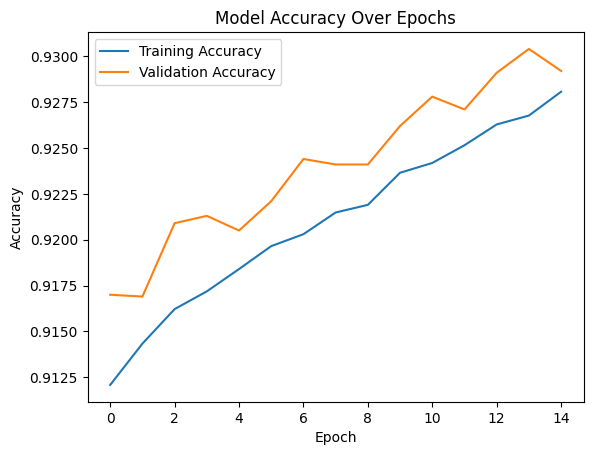

In [28]:
plt.plot(CNN_history_lt.history["accuracy"], label="Training Accuracy")
if "val_accuracy" in CNN_history_lt.history:
    plt.plot(CNN_history_lt.history["val_accuracy"], label="Validation Accuracy")
plt.title("Model Accuracy Over Epochs")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.show()

Extra visualizations on how the machine identifies the numbers

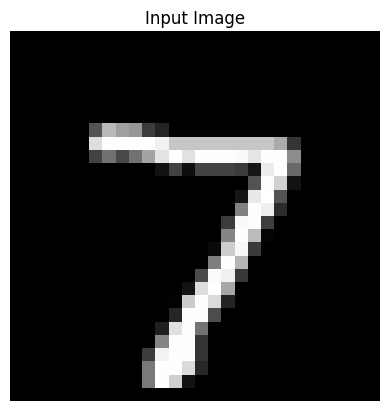

In [29]:
img = x_test[0] # first image from test set
plt.imshow(img.squeeze(), cmap="gray")
plt.title("Input Image")
plt.axis("off")
plt.show()

In [30]:
pred = np.argmax(CNNmodel.predict(img[np.newaxis, ...]))
print(f"Predicted class: {pred}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
Predicted class: 7


In [31]:
for i, layer in enumerate(CNNmodel.layers):
    print(i, layer.name)

0 reshape
1 conv2d
2 max_pooling2d
3 flatten_1
4 dense_2


In [32]:
import tensorflow as tf

# i had problems showingcasing anything from my previous models due to some unknown errors, so i recreated the model here*
#CNNmodel = keras.Sequential([
#    keras.layers.Reshape((28, 28, 1), input_shape=(28, 28)),
#    keras.layers.Conv2D(32, (3, 3), activation="relu"),
#    keras.layers.MaxPooling2D((2, 2)),
#    keras.layers.Flatten(),
#    keras.layers.Dense(10, activation="softmax")
#])

inputs = tf.keras.Input(shape=(28, 28), name="input_layer")
x = tf.keras.layers.Reshape((28, 28, 1))(inputs)
x = tf.keras.layers.Conv2D(32, (3, 3), activation="relu", padding="valid", name="conv1")(x) # valid padding to be the same as the original one
x = tf.keras.layers.MaxPooling2D((2, 2), name="pool1")(x)
x = tf.keras.layers.Flatten()(x)
outputs = tf.keras.layers.Dense(10, activation="softmax")(x)

functional_model = tf.keras.Model(inputs=inputs, outputs=outputs)
functional_model.set_weights(CNNmodel.get_weights())


* *Apparently sequential models cannot do this line "activation_model = tf.keras.Model(inputs=functional_model.input, outputs=layer_outputs)"
because the tensors are "skipped" when they are made in sequential models but when they are explicity made with tensors as i did now they work well

After some consideration i decided to not commit my tries because whatever I tried it simply didn't work so I just gave up with trying it

In [33]:
target_digit = 6
indices = np.where(y_train == target_digit)[0] # get the first digit for whatever digit i want
img = x_train[indices[0]]

layer_outputs = [functional_model.get_layer("conv1").output]
activation_model = tf.keras.Model(inputs=functional_model.input, outputs=layer_outputs)
activations = activation_model.predict(img[np.newaxis, ...], verbose=0)[0]

activity_per_filter = np.sum(activations, axis=(0, 1)) #activity is all the pixel values summed up

top_indices = np.argsort(activity_per_filter)[::-1][:10] # top 10 most used filters

print(f"10 most active filters: {top_indices}")
print(f"Activity values: {activity_per_filter[top_indices]}")

10 most active filters: [11 22  6 16 12 10 28  2 19 23]
Activity values: [82.3931   55.221325 48.013    19.902374 19.779596 19.280954 17.511648
 17.483206 17.4163   17.044043]


Let's see visually 

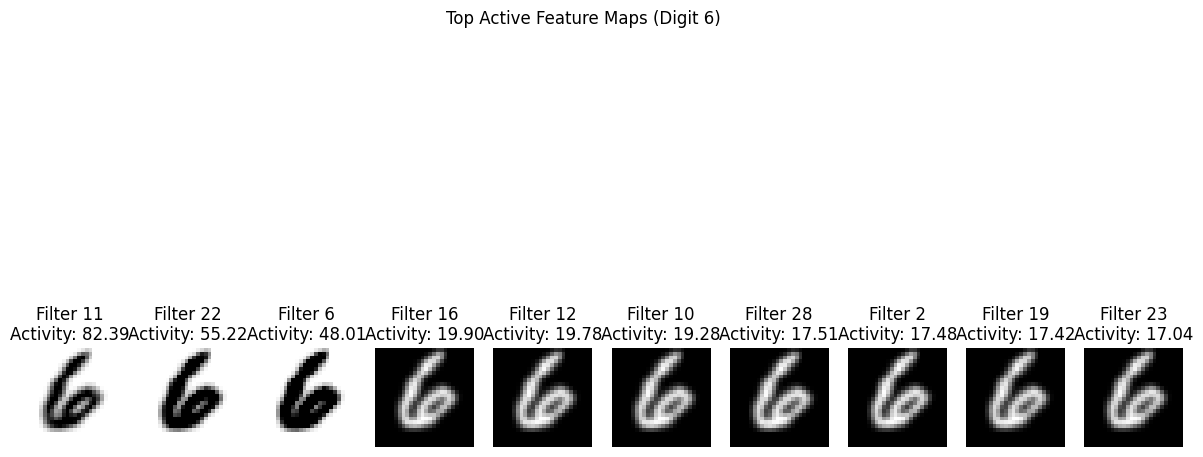

In [34]:
fig, axes = plt.subplots(1, 10, figsize=(15, 8))
for plot_idx, filter_idx in enumerate(top_indices):
    ax = axes[plot_idx]
    feature_map = activations[:, :, filter_idx]
    
    # only get those that are actually used + normalize them
    if feature_map.max() > 0:
        feature_map = (feature_map - feature_map.min()) / (feature_map.max() - feature_map.min())
    
    ax.imshow(feature_map, cmap="gray")
    ax.set_title(f"Filter {filter_idx}\nActivity: {activity_per_filter[filter_idx]:.2f}")
    ax.axis("off")

plt.suptitle(f"Top Active Feature Maps (Digit {target_digit})")
plt.show()

Since all of them look the same lets see if the kernels that go through them are also the same or not

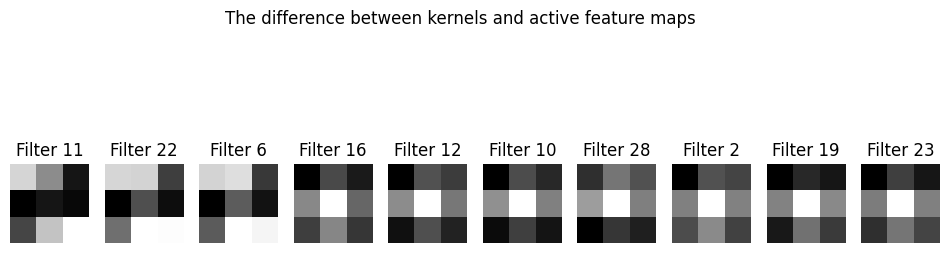

In [35]:
weights = CNNmodel.layers[1].get_weights()[0] # get all weights from the first Conv2D layer

fig, axes = plt.subplots(1, 10, figsize=(12, 4))
for i, idx in enumerate(top_indices):
    ax = axes[i]
    # get the specific 3x3 kernel for this filter
    kernel = weights[:, :, 0, idx]
    kernel_norm = (kernel - kernel.min()) / (kernel.max() - kernel.min())
    
    ax.imshow(kernel_norm, cmap="gray")
    ax.set_title(f"Filter {idx}")
    ax.axis("off")

plt.suptitle("The difference between kernels and active feature maps")
plt.show()

fashion MNIST with the same models

In [36]:
!pip install kagglehub
import kagglehub
from kagglehub import KaggleDatasetAdapter

You should consider upgrading via the 'C:\Users\alici\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [41]:
(fx_train, fy_train), (fx_test, fy_test) = keras.datasets.fashion_mnist.load_data()

print(fx_train.shape)  # (60000, 28, 28)
print(fy_train.shape)  # (60000,)

(60000, 28, 28)
(60000,)


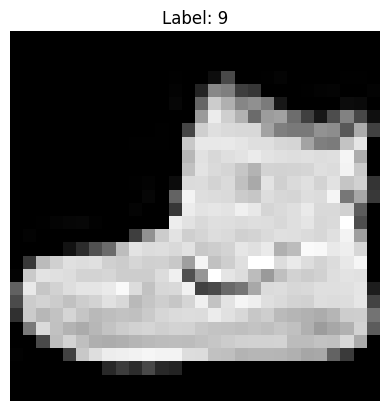

In [42]:
plt.imshow(fx_train[0], cmap="gray") # cmap="gray" to make it balck & white
plt.title(f"Label: {fy_train[0]}")
plt.axis("off")
plt.show()

In [48]:
base_history_f = base_model.fit(
    fx_train, fy_train,
    epochs=20,
    validation_data=(fx_test, fy_test)
)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8342 - loss: 46.7131 - val_accuracy: 0.8316 - val_loss: 88.5700
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8332 - loss: 44.1131 - val_accuracy: 0.8057 - val_loss: 95.4811
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8379 - loss: 39.3693 - val_accuracy: 0.7947 - val_loss: 99.2088
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8403 - loss: 35.8110 - val_accuracy: 0.8202 - val_loss: 82.1986
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8343 - loss: 36.6488 - val_accuracy: 0.8413 - val_loss: 78.5974
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8373 - loss: 34.3883 - val_accuracy: 0.8185 - val_loss: 84.3959
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8401 - loss: 32.4123 - val_accuracy: 0.8241 - val_loss: 80.8269
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8395 - l

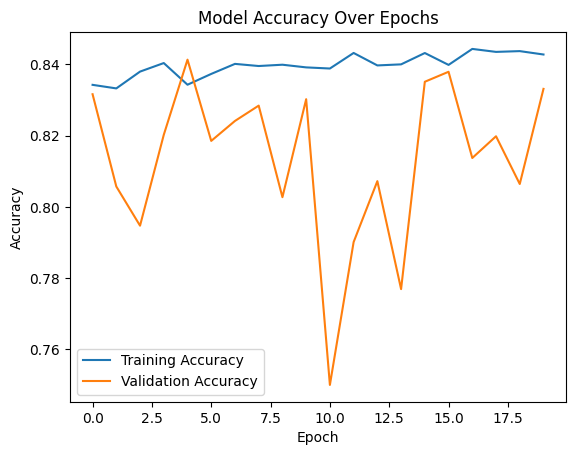

In [ ]:
plt.plot(base_history_f.history['accuracy'], label='Training Accuracy')
if 'val_accuracy' in base_history_f.history:
    plt.plot(base_history_f.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs (Fashion, Base)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [50]:
CNN_history_f = CNNmodel.fit(
    fx_train, fy_train,
    epochs=20,
    validation_data=(fx_test, fy_test)
)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8224 - loss: 231.4578 - val_accuracy: 0.7849 - val_loss: 270.7502
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8297 - loss: 164.4074 - val_accuracy: 0.8242 - val_loss: 154.7312
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8364 - loss: 120.1738 - val_accuracy: 0.8050 - val_loss: 137.0728
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8450 - loss: 87.6876 - val_accuracy: 0.8397 - val_loss: 87.8533
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8505 - loss: 66.6585 - val_accuracy: 0.8383 - val_loss: 71.6394
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8550 - loss: 53.3393 - val_accuracy: 0.8307 - val_loss: 61.4515
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8584 - loss: 43.9753 - val_accuracy: 0.8232 - val_loss: 63.3749
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.86

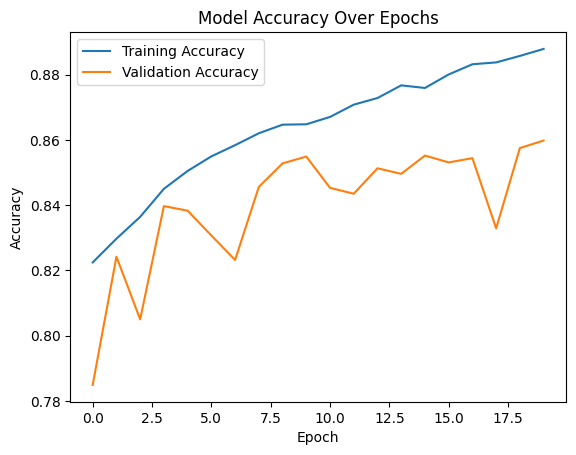

In [ ]:
plt.plot(CNN_history_f.history["accuracy"], label="Training Accuracy")
if "val_accuracy" in CNN_history_f.history:
    plt.plot(CNN_history_f.history["val_accuracy"], label="Validation Accuracy")
plt.title("Model Accuracy Over Epochs (Fashion, CNN)")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.show()

pretty good basic scores, but fluctuates a lot which is expected due to varience (i think)

### Extra section for the live coding task
Should be 10 lines of code, will probably make some pretty graphs